In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import glob
import cv2
import os

In [4]:
df=pd.read_excel("datasets\\TCP_dataset.xlsx")
# 一个Excel名字叫“temp/xlsx”，里面包含17列，其中前16列是特征，最后一列是目标值；其中第6到14列为分类数据，其余均为连续数值，请对数据进行适当处理后，利用神经网络模型训练预测，并给出训练误差

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cs                    595 non-null    float64
 1   FA                    595 non-null    float64
 2   I                     595 non-null    float64
 3   structure             595 non-null    object 
 4   bandgap               595 non-null    float64
 5   substrate             595 non-null    object 
 6   ETL                   595 non-null    object 
 7   HTL                   583 non-null    object 
 8   electrode             594 non-null    object 
 9   depositionProcedure   595 non-null    object 
 10  depositionMethod      595 non-null    object 
 11  Anti-solvent          417 non-null    object 
 12  PrecursorSolvent      587 non-null    object 
 13  AnnealingTemperature  595 non-null    float64
 14  AnnealingTime         595 non-null    float64
 15  PCE                   5

In [6]:
df = df.drop(df.columns[[2, 3, 5, 18, 19, 20, 22, 23]], axis=1)

In [8]:
# 将第5、16列转换为float64类型
df[df.columns[[4, 15]]] = df[df.columns[[4, 15]]].astype('float64')

In [9]:
# 将第5、16列转换为float64类型
df[df.columns[[3]]] = df[df.columns[[3]]].astype('object')

In [10]:
df['AnnealingTime']=df['AnnealingTime'].fillna(0)
df['AnnealingTemperature']=df['AnnealingTemperature'].fillna(20)

In [12]:
df=df.fillna("unused")

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import shap
import lightgbm

# 对分类特征进行编码
for col in df.columns[[3, 5, 6, 7, 8, 9, 10, 11, 12]]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# 定义特征和目标值
X = df.iloc[:, :15]
y = df.iloc[:, -1]

# 创建随机森林模型
model = lightgbm()
from sklearn.model_selection import GridSearchCV

# 定义要调优的参数
param_grid = {
    'n_estimators': [30,50,100, 200, 300],
    'max_depth': [5, 7,9,11],
    'min_samples_split': [2, 5, 10]
}

# 创建一个GridSearchCV对象
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# 进行超参数调优
grid_search.fit(X, y)

# 打印最佳参数
print('Best parameters: ', grid_search.best_params_)

# 使用最佳参数训练模型
model = grid_search.best_estimator_

# 创建一个SHAP解释器
explainer = shap.TreeExplainer(model)

# 计算SHAP值
shap_values = explainer.shap_values(X)

# 绘制SHAP值
shap.summary_plot(shap_values, X)

TypeError: 'module' object is not callable

Best parameters:  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 30}


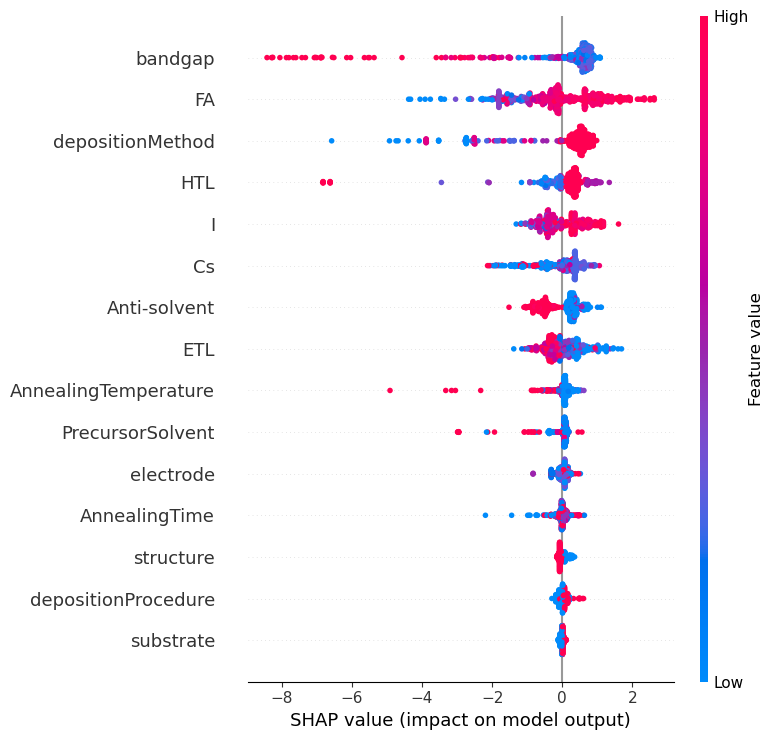

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import shap

# 对分类特征进行编码
for col in df.columns[[3, 5, 6, 7, 8, 9, 10, 11, 12]]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# 定义特征和目标值
X = df.iloc[:, :15]
y = df.iloc[:, -1]

# 创建随机森林模型
model = GradientBoostingRegressor()
from sklearn.model_selection import GridSearchCV

# 定义要调优的参数
param_grid = {
    'n_estimators': [30,50,100, 200, 300],
    'max_depth': [5, 7,9,11],
    'min_samples_split': [2, 5, 10]
}

# 创建一个GridSearchCV对象
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)

# 进行超参数调优
grid_search.fit(X, y)

# 打印最佳参数
print('Best parameters: ', grid_search.best_params_)

# 使用最佳参数训练模型
model = grid_search.best_estimator_

# 创建一个SHAP解释器
explainer = shap.TreeExplainer(model)

# 计算SHAP值
shap_values = explainer.shap_values(X)

# 绘制SHAP值
shap.summary_plot(shap_values, X)

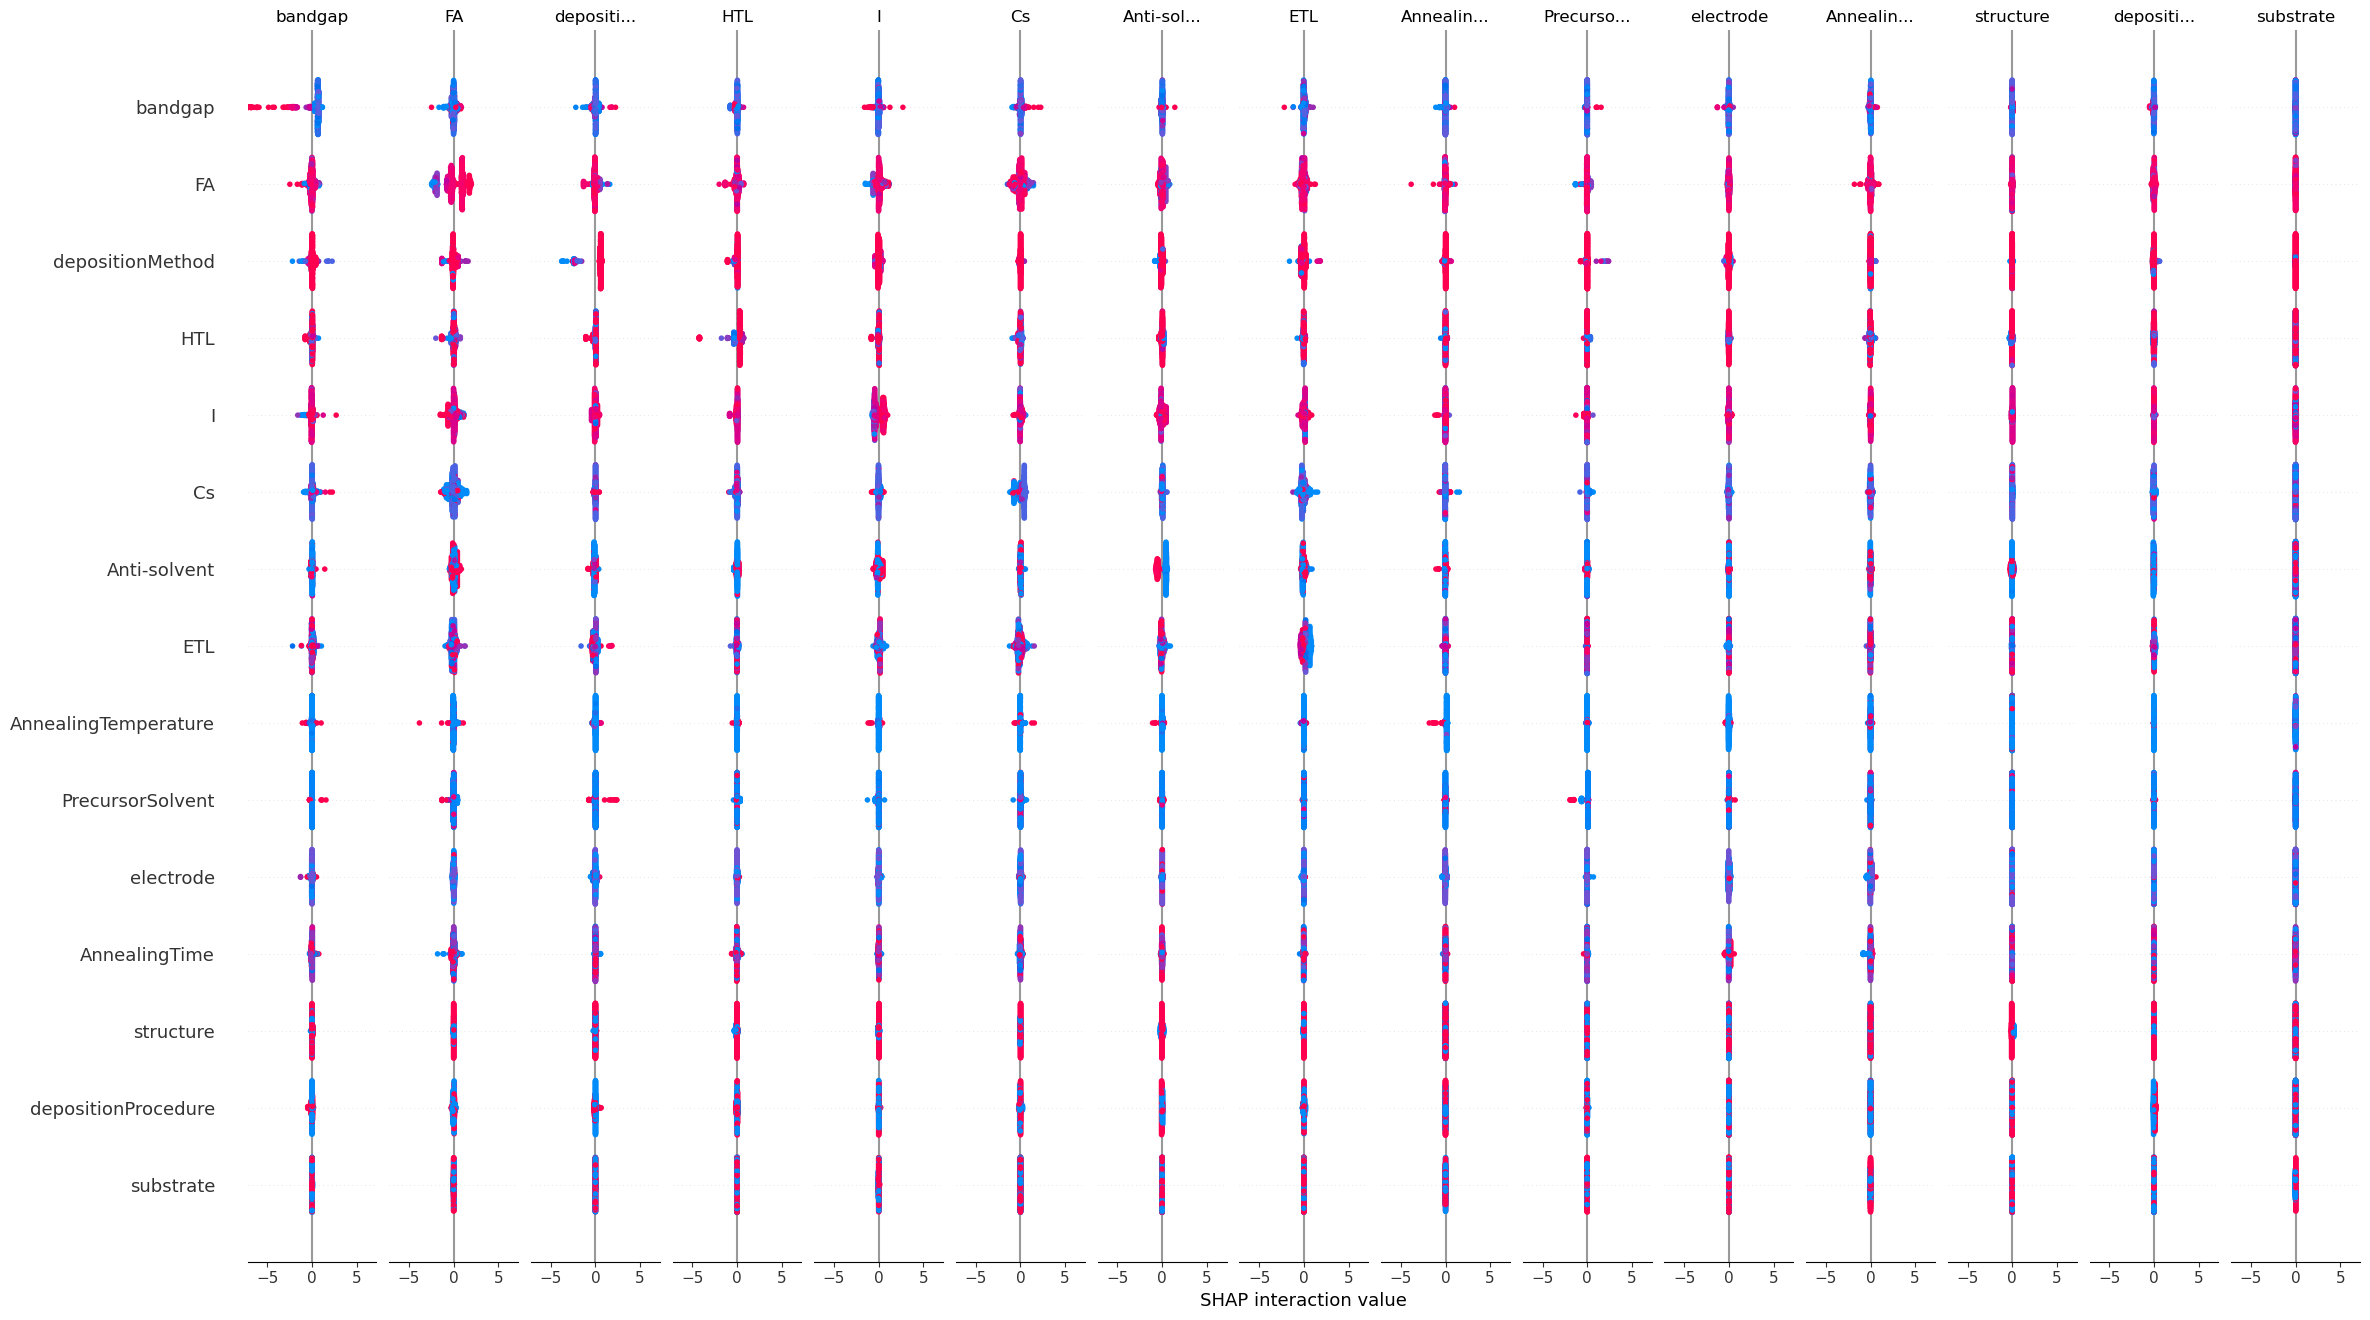

In [25]:
shap_interaction_values = explainer.shap_interaction_values(X)
# shap.summary_plot(shap_interaction_values, X)
shap.summary_plot(shap_interaction_values, X, max_display=X.shape[1])

In [43]:
# 创建一个SHAP解释器
# explainer = shap.Explainer(model)

# # 计算SHAP值
# shap_values = explainer(X)

# # 绘制waterfall图
# shap.plots.waterfall(shap_values[0], max_display=14)
shap.initjs()
# shap.plots.waterfall(shap_values[0], max_display=14)
explainer = shap.TreeExplainer(model)

# 计算 SHAP 值
shap_values = explainer.shap_values(X)

# 创建 force_plot
shap.force_plot(explainer.expected_value, shap_values, X)

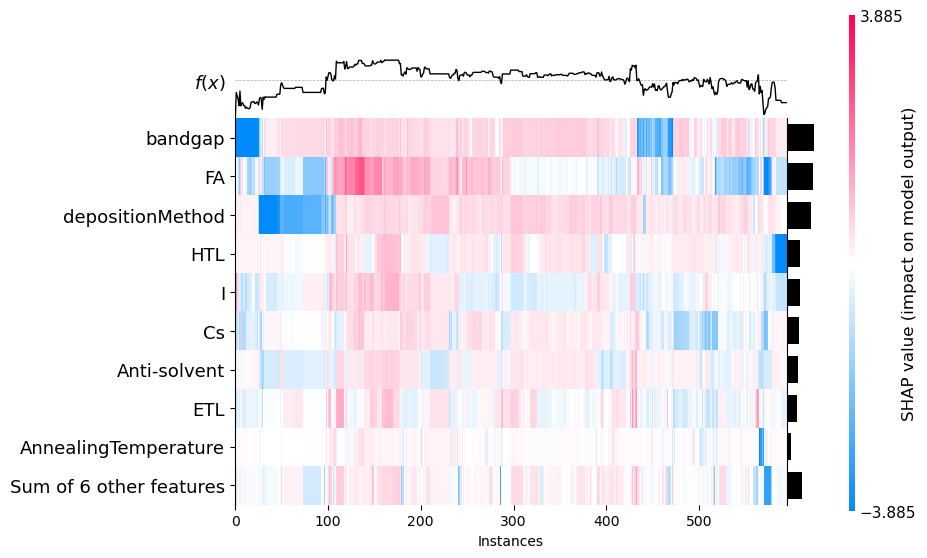

In [28]:
shap.plots.heatmap(shap_values[:])

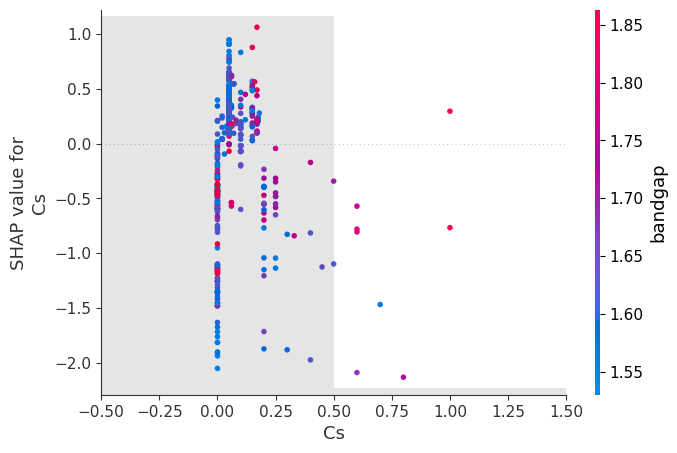

In [35]:
# shap.plots.scatter(shap_values[:,'Cs' ], color=shap_values)
shap.plots.scatter(shap_values[:, "Cs"], color=shap_values[:, "bandgap"])

In [37]:
shap.force_plot(explainer.expected_value, shap_values, X)

ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [40]:
explainer = shap.TreeExplainer(model)

# 计算 SHAP 值
shap_values = explainer.shap_values(X)

# 创建 force_plot
shap.force_plot(explainer.expected_value, shap_values, X)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 445
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cs                    376 non-null    float64
 1   FA                    376 non-null    float64
 2   I                     376 non-null    float64
 3   structure             376 non-null    int64  
 4   bandgap               178 non-null    float64
 5   substrate             376 non-null    object 
 6   ETL                   376 non-null    object 
 7   ETL-2                 192 non-null    object 
 8   ETLthickness          38 non-null     float64
 9   HTL                   364 non-null    object 
 10  HTLthickness          29 non-null     float64
 11  electrode             375 non-null    object 
 12  depositionProcedure   364 non-null    object 
 13  depositionMethod      367 non-null    object 
 14  Anti-solvent          286 non-null    object 
 15  PrecursorSolvent      3

In [64]:
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import concatenate
import numpy as np
import locale
import os

In [65]:
df.isnull().sum()

Cs                        0
FA                        0
I                         0
structure                 0
bandgap                 198
substrate                 0
ETL                       0
ETL-2                   184
ETLthickness            338
HTL                      12
HTLthickness            347
electrode                 1
depositionProcedure      12
depositionMethod          9
Anti-solvent             90
PrecursorSolvent         16
AnnealingTemperature     20
AnnealingTime            20
PCE                       0
dtype: int64

In [ ]:
df

In [27]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
print("[INFO] processing data...")
split = train_test_split(df, test_size=0.2, random_state=42)
(train, test) = split
 
# find the largest house price in the training set and use it to
# scale our house prices to the range [0, 1] (will lead to better
# training and convergence)
maxPCE = train["PCE"].max()
trainY = train["PCE"] / maxPCE
testY = test["PCE"] / maxPCE
 
# process the house attributes data by performing min-max scaling
# on continuous features, one-hot encoding on categorical features,
# and then finally concatenating them together


[INFO] processing data...


In [31]:

continuous=['Cs', 'FA', 'MA', 'Pb', 'I', 'Br', 'structure', 'bandgap', 'ETLthickness',
            'HTLthickness','AnnealingTemperature', 'AnnealingTime']
cs = MinMaxScaler()
trainContinuous = cs.fit_transform(train[continuous])
testContinuous = cs.transform(test[continuous])

discrete=['substrate','ETL', 'ETL-2',  'HTL',  'electrode','depositionProcedure', 'depositionMethod', 'Anti-solvent','PrecursorSolvent']
for str1 in discrete:
	zipBinarizer = LabelBinarizer().fit(df[str1].astype(str))
	trainCategorical = zipBinarizer.transform(train[str1])
	testCategorical = zipBinarizer.transform(test[str1])
 
	# construct our training and testing data points by concatenating
	# the categorical features with the continuous features
	trainX = np.hstack([trainCategorical, trainContinuous])
	testX = np.hstack([testCategorical, testContinuous])

TypeError: data type 'substrate' not understood

In [ ]:
(trainAttrX, testAttrX) = (trainX, testX)

In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
 
def create_mlp(dim, regress=False):
	# define our MLP network
	model = Sequential()
	model.add(Dense(8, input_dim=dim, activation="relu"))
	model.add(Dense(4, activation="relu"))
 
	# check to see if the regression node should be added
	if regress:
		model.add(Dense(1, activation="linear"))
 
	# return our model
	return model

Using TensorFlow backend.


In [ ]:
def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
	# initialize the input shape and channel dimension, assuming
	# TensorFlow/channels-last ordering
	inputShape = (height, width, depth)
	chanDim = -1
 
	# define the model input
	inputs = Input(shape=inputShape)
 
	# loop over the number of filters
	for (i, f) in enumerate(filters):
		# if this is the first CONV layer then set the input
		# appropriately
		if i == 0:
			x = inputs
 
		# CONV => RELU => BN => POOL
		x = Conv2D(f, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x)
    # flatten the volume, then FC => RELU => BN => DROPOUT
	x = Flatten()(x)
	x = Dense(16)(x)
	x = Activation("relu")(x)
	x = BatchNormalization(axis=chanDim)(x)
	x = Dropout(0.5)(x)
 
	# apply another FC layer, this one to match the number of nodes
	# coming out of the MLP
	x = Dense(4)(x)
	x = Activation("relu")(x)
 
	# check to see if the regression node should be added
	if regress:
		x = Dense(1, activation="linear")(x)
 
	# construct the CNN
	model = Model(inputs, x)
 
	# return the CNN
	return model

In [ ]:
# create the MLP and CNN models
mlp = create_mlp(trainAttrX.shape[1], regress=False)
cnn = create_cnn(64, 64, 3, regress=False)
 
# create the input to our final set of layers as the *output* of both
# the MLP and CNN
combinedInput = concatenate([mlp.output, cnn.output])
 
# our final FC layer head will have two dense layers, the final one
# being our regression head
x = Dense(4, activation="relu")(mlp.output)
x = Dense(1, activation="linear")(x)
 
# our final model will accept categorical/numerical data on the MLP
# input and images on the CNN input, outputting a single value (the
# predicted price of the house)
model = Model(inputs=[mlp.input], outputs=x)
# compile the model using mean absolute percentage error as our loss,
# implying that we seek to minimize the absolute percentage difference
# between our price *predictions* and the *actual prices*
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
 


In [ ]:
# train the model
print("[INFO] training model...")
model.fit(
	trainAttrX, trainY,
	validation_data=(testAttrX, testY),
	epochs=200, batch_size=8)
 


[INFO] training model...
Instructions for updating:
Use tf.cast instead.
Train on 271 samples, validate on 91 samples
Epoch 1/200
271/271 [==============================] - 4s 16ms/step - loss: 197.6935 - val_loss: 68.9467
Epoch 2/200
271/271 [==============================] - 1s 2ms/step - loss: 99.1250 - val_loss: 80.8105
Epoch 3/200
271/271 [==============================] - 1s 2ms/step - loss: 73.2105 - val_loss: 72.8609
Epoch 4/200
271/271 [==============================] - 1s 2ms/step - loss: 76.2199 - val_loss: 52.4515
Epoch 5/200
271/271 [==============================] - 1s 2ms/step - loss: 63.6302 - val_loss: 51.8580
Epoch 6/200
271/271 [==============================] - 1s 2ms/step - loss: 61.0288 - val_loss: 49.7902
Epoch 7/200
271/271 [==============================] - 1s 2ms/step - loss: 60.1317 - val_loss: 50.5786
Epoch 8/200
271/271 [==============================] - 1s 2ms/step - loss: 55.9758 - val_loss: 45.5114
Epoch 9/200
271/271 [==============================] - 1

In [ ]:
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = model.predict(testAttrX)

# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)

 
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
 
# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
	locale.currency(df["price"].mean(), grouping=True),
	locale.currency(df["price"].std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))




[INFO] predicting house prices...
[INFO] avg. house price: $533,388.27, std house price: $493,403.08
[INFO] mean: 23.21%, std: 20.37%


In [2]:
import pickle5 as pickle
import pandas as pd 
import numpy as np

with open('20230303_mySeriesDrop.pkl', "rb") as fh:
    mySeriesDrop = pickle.load(fh)

In [4]:
mySeriesDrop.to_excel("degraded.xlsx",index=False)

In [2]:
import pandas as pd
import numpy as np
df=pd.read_excel(r"D:\codefiles\vscode\python\triplePCE\fill.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cs                    555 non-null    float64
 1   FA                    555 non-null    float64
 2   I                     555 non-null    float64
 3   structure             555 non-null    int64  
 4   bandgap               555 non-null    float64
 5   substrate             555 non-null    object 
 6   ETL                   555 non-null    object 
 7   HTL                   555 non-null    object 
 8   electrode             555 non-null    object 
 9   depositionProcedure   555 non-null    object 
 10  depositionMethod      555 non-null    object 
 11  Anti-solvent          555 non-null    object 
 12  PrecursorSolvent      555 non-null    object 
 13  AnnealingTemperature  555 non-null    int64  
 14  AnnealingTime         555 non-null    int64  
 15  PCE                   5

In [9]:
df['PrecursorSolvent'].unique()

array(['DMF/DMSO/GBL', 'DMF/DMSO', 'DMF/DMSO/4F-PEAI/Pb(SCN)2',
       'DMF/DMSO/BMIM:BF4', 'DMF/DMSO/BMIM:BF4/4F-PEAI/Pb(SCN)2',
       'DMF:DMSO:NMP', 'DMF', 'DMF/NMP', 'unused', 'DMSO',
       'DMF/DMSO/DmmimCl', 'GBL/DMF', 'DMF/DMSO/APL'], dtype=object)